In [ ]:
pip install -r requirements.txt

# 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/stroke_data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Observation (1)
There are 11 parameters with 5110 values each, except for BMI data (4% of missing values). 
All parameters probably can be important, except for "ID". It's unlikely to contain any useful information that's why can be neglected in the analysis

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Observation (2)
1.	The average age of people is 43 years with the standard deviation of 22.6 years, which means that almost all age groups were covered. The maximum age is 82 years, the minimum is 1 month.
2.	The average glucose level is 106.1 mg/dL with the standard deviation of 45.3 mg/dL, which generally shows a healthy state of most people, but there are people with unhealthy indicators for the average glucose level. The maximum value reaches 271.7 mg/dL.
3.	The average level of the body mass index is 28.9 kg/m2, and given the standard deviation of 7.9 kg/m2, it can be assumed that most people are overweight. The maximum index is 97.6 kg/m2, which indicates an obvious obesity.
4.	It is worth to note that the average values of the following parameters (hypertension, heart disease, stroke) are quite low, and it says that there will be few positive values in the dataset. Most likely, it will be difficult to predict something with so under-represented information.

In [7]:
df.describe(exclude=[np.number])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Observation (3)
The categorical data is totally complete. It's strange that there are three unique values for "Gender". It should be investigated and pre-processed if necessary.

### CATEGORICAL VARIABLES IN MORE DETAIL

In [8]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


### Observation (4)
As there is only one line where gender is "Other", I make an assumption in the analysis that it could be a man. In any case, it wouldn't greatly affect the final result.

C:\Users\Gali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


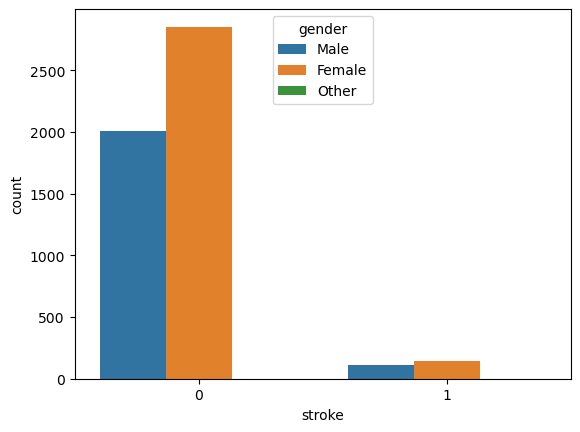

In [10]:
plt.figure
sns.countplot(df['stroke'], hue=df['gender'])
plt.show()

### Observation (5)
As shown in the diagram, the ratio between men and women is slightly different for both values of "stroke". And it was mentioned earlier, there is significantly low representation of the positive values of the "stroke" parameter

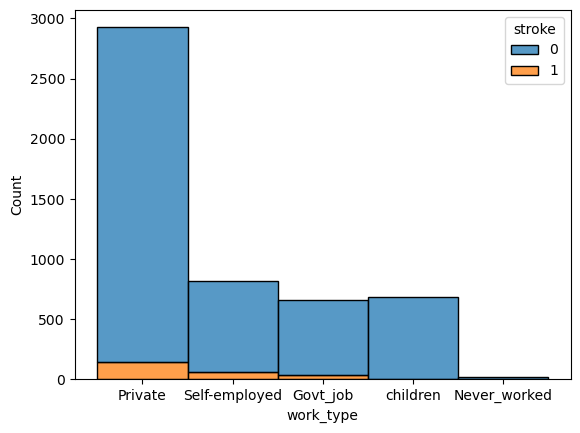

In [11]:
plt.figure
sns.histplot(x="work_type",hue="stroke",multiple="stack",data=df)
plt.show()

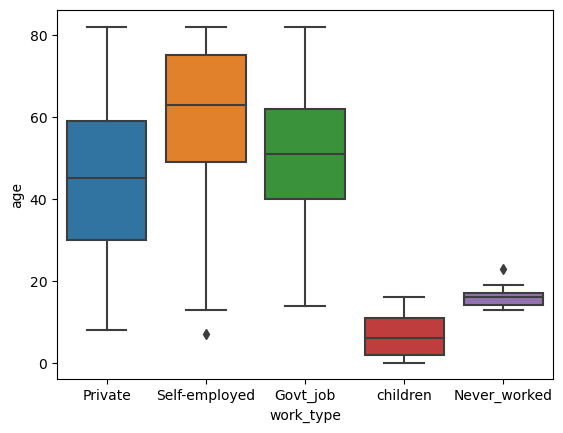

In [12]:
sns.boxplot(x='work_type',y='age', data=df)
plt.show()

### Observation (6)
1. Most of the people work in private companies. There is also a large number of strokes in this category. 
2. A small number of the unemployed people.
3. People over 60 prefer to work for themselves, probably the retirement can be the reason
4. It's also interesting to see that people under 40 don't work in government positions.


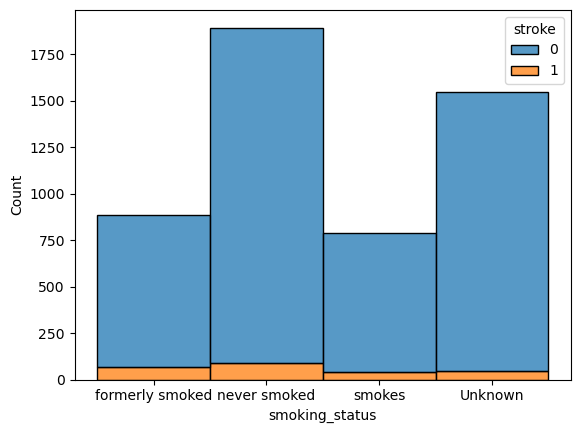

In [13]:
plt.figure
sns.histplot(x="smoking_status",hue="stroke",multiple="stack",data=df)
plt.show()

### Observation (7.1)
Based on the histogram above, most people have never smoked and a lot of data is unknown. The last one may complicate the analysis. It is necessary to define whether it is possible to pre-process data to be more relevant

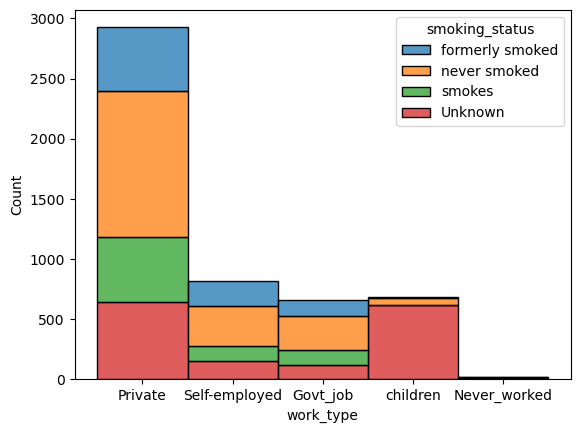

In [14]:
sns.histplot(x="work_type",hue="smoking_status",multiple="stack",data=df)
plt.show()

In [15]:
df.loc[df.work_type == "children","smoking_status"].value_counts()

Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: smoking_status, dtype: int64

In [16]:
df.loc[df.age < 12,"smoking_status"].value_counts()

Unknown            521
never smoked        16
formerly smoked      5
smokes               1
Name: smoking_status, dtype: int64

### Observation (7.2)
As it can be seen from the histogram, about half of those "unknown" is in the "children" category, and therefore it just can be assumed that children should be in the "never smoked" category

In [17]:
df_children_never_smoked = df
df_children_never_smoked.loc[df.work_type == "children","smoking_status"] = 'never smoked'

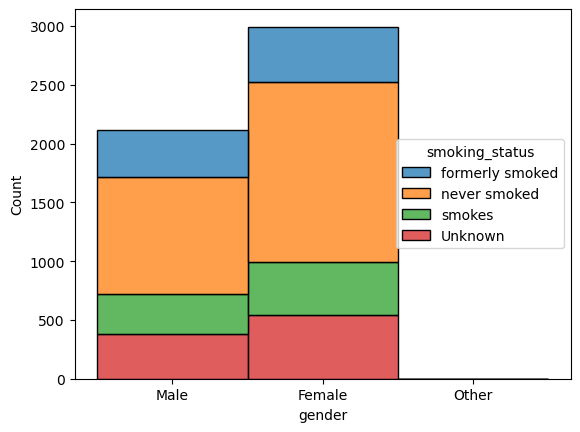

In [18]:
sns.histplot(x="gender",hue="smoking_status",multiple="stack",data=df_children_never_smoked)
plt.show()

In [19]:
df[df_children_never_smoked.gender=='Female'].smoking_status.value_counts()

never smoked       1528
Unknown             544
formerly smoked     471
smokes              451
Name: smoking_status, dtype: int64

### Observation (7.3)
1.	If we exclude children and take only smoking adults, then according to statistics, the ratio of men to women must be at least 2:1, so we can assume that the number of smoking men is under-represented
2.	As the number of non-smoking women is always higher, so it is possible in theory to determine the remaining "unknowns" by the frequently occurring value. It's just an assumption.

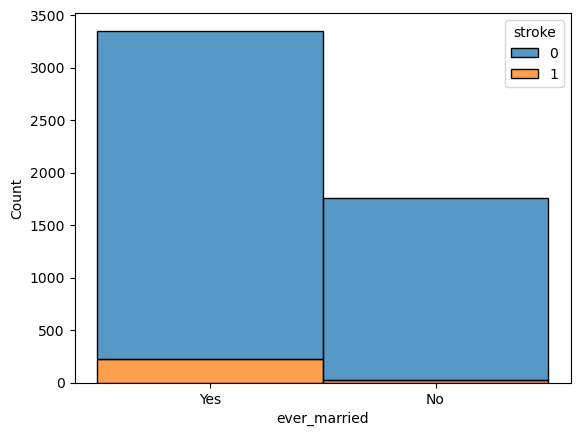

In [20]:
plt.figure
sns.histplot(x="ever_married",hue="stroke",multiple="stack",data=df)
plt.show()

### Observation (8)
The diagram shows an uneven distribution of "ever-married" and "never-married" people, and it can be noted that a large number of positive values of the "stroke" is in the category of "ever-married" people.

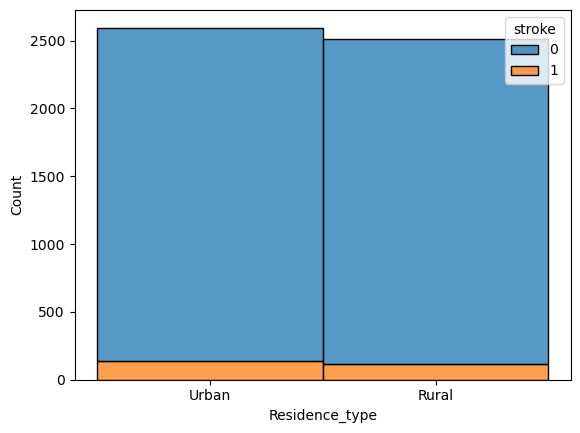

In [21]:
plt.figure
sns.histplot(x="Residence_type",hue="stroke",multiple="stack",data=df)
plt.show()

### Observation (9)
The diagram shows a uniform number of residents of rural and urban areas, but apparently the place of the residence does not particularly affect the occurence of stroke

### QUANTITATIVE VARIABLES IN MORE DETAIL

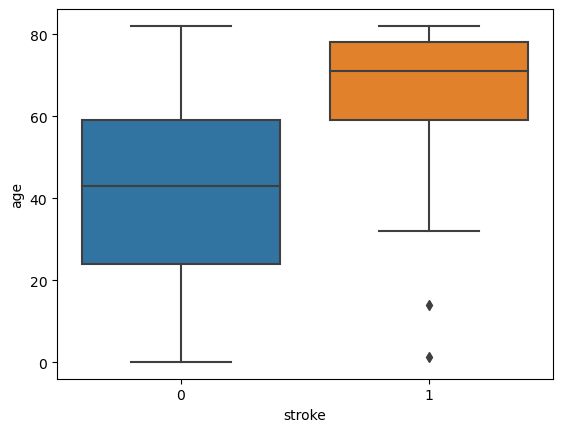

In [22]:
sns.boxplot(x='stroke',y='age', data=df)
plt.show()

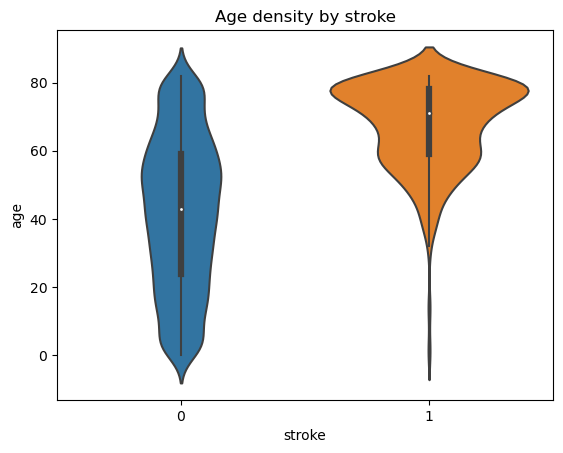

In [23]:
seaborn_plot = sns.violinplot(x='stroke',y='age', data=df)
plt.title('Age density by stroke')
plt.show()

### Observation (10)
These plots above show that mostly older people are susceptible to disease, considering some exceptions. The shape of violin plots also confirms it.

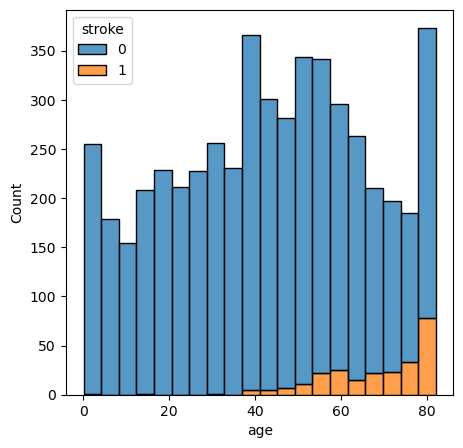

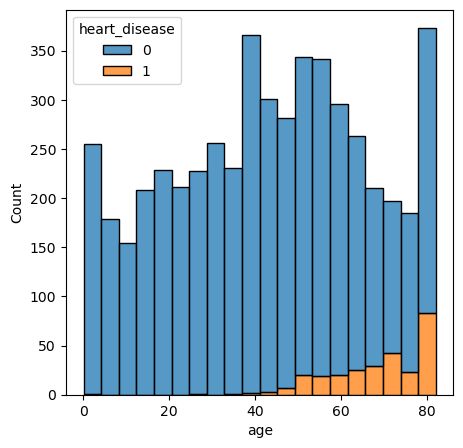

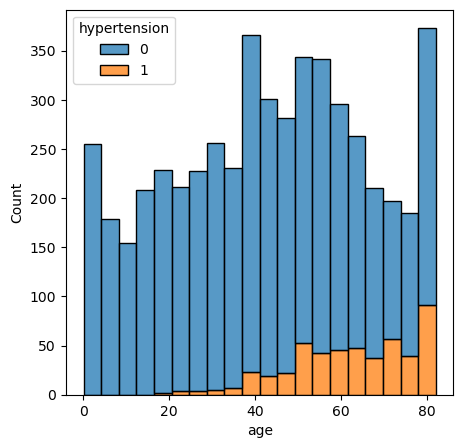

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="stroke",multiple="stack",data=df)
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="heart_disease",multiple="stack",data=df)
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(x="age",hue="hypertension",multiple="stack",data=df)
plt.show()

### Observation (11)
It was mentioned before that older people have a stroke much more often. It is also worth to note that the disease distributions are almost similar across all histograms,that's why it is necessary to figure out whether there is any significant correlation between them.

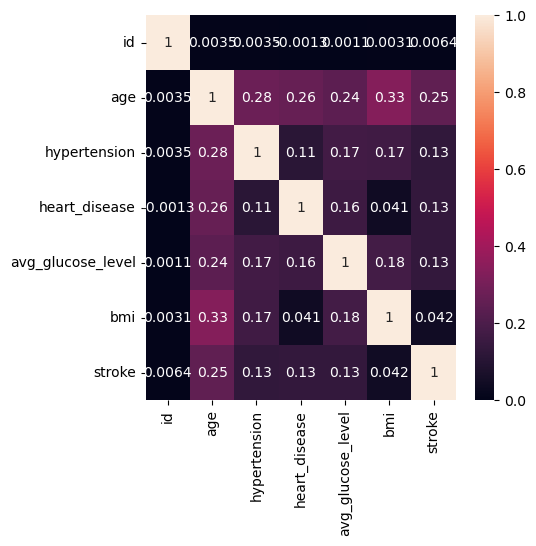

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Observation (12)
As it turned out, there are no particularly strong correlations anywhere. The maximum correlation is 33% (between body mass index and age).

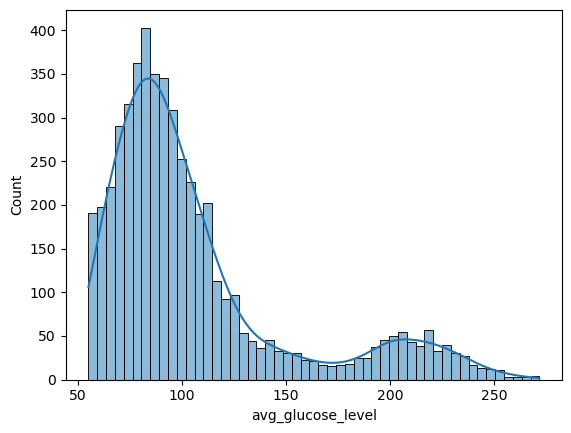

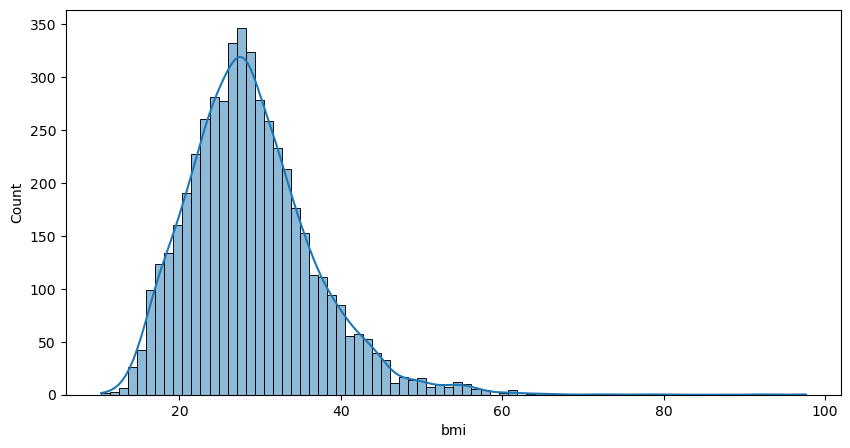

In [26]:
sns.histplot(df['avg_glucose_level'],kde=True)
plt.show()
plt.figure(figsize=(10,5))

sns.histplot(df['bmi'],kde=True)
plt.show()

### Observation (13)
1. The histogram of the body mass index has a normal distribution, which gives us the right to replace the missing values with an arithmetic mean.
2. The histogram of the average glucose level has a bimodal distribution, which indicates the heterogeneity of the data, probably it should be divided into categories for a more accurate prediction.

In [27]:
df_obesity = df[df.bmi >30]

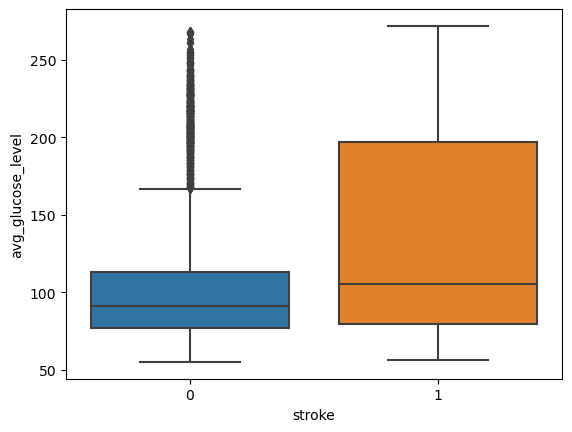

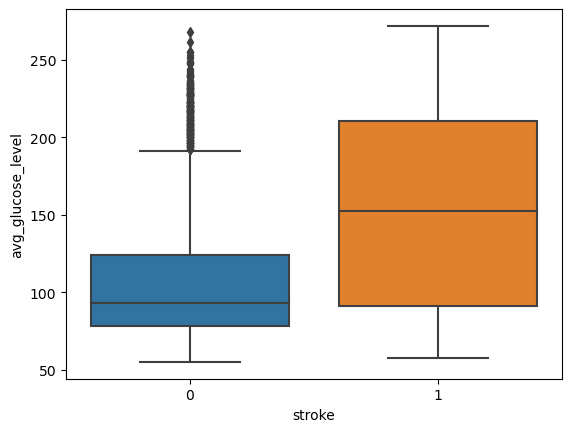

In [28]:
sns.boxplot(x='stroke',y='avg_glucose_level', data=df)
plt.show()

sns.boxplot(x='stroke',y='avg_glucose_level', data=df_obesity)
plt.show()

###  Observation (14)
When filtering out overweight people, it can be noticed that the median of the average glucose level increased (from 100 to 150 mg/dL ) for people who has a stroke. It should be borne in mind that the body mass index may also be categorized for correct analysis

# 2. Data cleaning and processing

In [29]:
df_clean = df.drop(["id"],axis=1) #Deleted an unnecessary column

In [30]:
df_clean = df_clean.fillna(np.mean(df['bmi'])).round(2) #Filled in the missing values

In [31]:
df_clean.loc[df_clean.gender == 'Other', 'gender'] = 'Male' #Pre-processed the value

In [32]:
df_clean.loc[df.work_type == "children","smoking_status"] = 'never smoked'

In [33]:
df_clean.loc[(df_clean['smoking_status'] == 'Unknown') & (df_clean['gender'] == 'Male'),"smoking_status"] = 'smokes'

In [34]:
df_clean.loc[(df_clean['smoking_status'] == 'Unknown') & (df_clean['gender'] == 'Female'),"smoking_status"] = 'never smoked'

In [35]:
df_clean.smoking_status.value_counts()

never smoked       3069
smokes             1169
formerly smoked     872
Name: smoking_status, dtype: int64

# 3. Feature engineering

In [36]:
df_clean['gender'] = df_clean['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
df_clean['ever_married'] = df_clean['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)
df_clean['work_type'] = df_clean['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
df_clean['Residence_type'] = df_clean['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df_clean['smoking_status'] = df_clean['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2}).astype(np.uint8)

In [37]:
def bmi_condition(x):
    if x>30:
        return 1 # Obese
    elif x<18.5:
        return 2 # Underweight
    elif x >=25: 
        return 3 # Overweight
    else:
        return 0 # Good

In [38]:
df_clean['bmi_norm']=df_clean['bmi'].apply(bmi_condition) 

In [39]:
def glucose_level_condition(x):
    if x<140:
        return 0 # Normal
    elif x>200:
        return 1 # Diabetes
    else:
        return 2 # Prediabetes

In [40]:
df_clean['avg_glucose_level_norm']=df_clean['avg_glucose_level'].apply(glucose_level_condition) 

In [41]:
df_clean.drop(columns=['bmi','avg_glucose_level'],inplace=True)

In [42]:
df_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,bmi_norm,avg_glucose_level_norm
0,0,67.0,0,1,1,0,1,2,1,1,1
1,1,61.0,0,0,1,1,0,0,1,3,1
2,0,80.0,0,1,1,0,0,0,1,1,0
3,1,49.0,0,0,1,0,1,1,1,1,2
4,1,79.0,1,0,1,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,1,0,0,3,0
5106,1,81.0,0,0,1,1,1,0,0,1,0
5107,1,35.0,0,0,1,1,0,0,0,1,0
5108,0,51.0,0,0,1,0,0,2,0,3,2


# 4. Choice justification

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
X = df_clean[['gender', 'age', 'hypertension','heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status', 'bmi_norm','avg_glucose_level_norm']]

In [45]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [46]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                  feature       VIF
0                  gender  2.146042
1                     age  8.740056
2            hypertension  1.214140
3           heart_disease  1.159612
4            ever_married  5.531193
5               work_type  1.388758
6          Residence_type  1.880368
7          smoking_status  1.733029
8                bmi_norm  2.386141
9  avg_glucose_level_norm  1.236364


### Observation (15)
The variance inflation factor indicates that two features (age and ever_married, VIF>5) have potentially strong correlation between them and other independent variables. One of them should be excluded.  And since, "age" is super important for further analysis therefore the ever_married column must be deleted to avoid multicollinearity.

In [47]:
df_clean.drop(columns=['ever_married'],inplace=True)

In [48]:
df_clean

,gender,age,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,bmi_norm,avg_glucose_level_norm
0,0,67.0,0,1,0,1,2,1,1,1
1,1,61.0,0,0,1,0,0,1,3,1
2,0,80.0,0,1,0,0,0,1,1,0
3,1,49.0,0,0,0,1,1,1,1,2
4,1,79.0,1,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,1,0,0,3,0
5106,1,81.0,0,0,1,1,0,0,1,0
5107,1,35.0,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,0,0,2,0,3,2


In [49]:
X = df_clean[['gender', 'age', 'hypertension','heart_disease', 'work_type','Residence_type', 'smoking_status', 'bmi_norm','avg_glucose_level_norm']]

In [50]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [51]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                  feature       VIF
0                  gender  2.141665
1                     age  4.592968
2            hypertension  1.213083
3           heart_disease  1.149959
4               work_type  1.373585
5          Residence_type  1.879584
6          smoking_status  1.727348
7                bmi_norm  2.379997
8  avg_glucose_level_norm  1.235995


# 5. Model training and evaluation

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_train, df_test = train_test_split(df_clean,test_size=0.2)

In [54]:
len(df_train)

4088

In [55]:
len(df_test)

1022

In [56]:
X_train = df_train.copy()
y_train = X_train.pop("stroke")

In [57]:
X_test = df_test.copy()
y_test = X_test.pop("stroke")

In [58]:
X_train.shape

(4088, 9)

In [59]:
X_test.shape

(1022, 9)

In [60]:
y_train.value_counts()

0    3886
1     202
Name: stroke, dtype: int64

In [61]:
y_test.value_counts()

0    975
1     47
Name: stroke, dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

In [63]:
# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier())
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC','MCC','TP','TN','FP','FN'])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    mcc = matthews_corrcoef(y_test,y_pred)

    # Calculate ROC AUC only if predict_proba is available
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    results_df = results_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }, ignore_index=True)

# Display the results DataFrame
pd.DataFrame(results_df)

C:\Users\Gali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3975396247.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3975396247.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3975396247.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.954012,0.000000,0.000000,0.000000,0.856247,0.000000,0,975,0,47
1,Decision Tree,0.925636,0.146341,0.127660,0.136364,0.550802,0.097946,6,940,35,41
2,Random Forest,0.943249,0.176471,0.063830,0.093750,0.759520,0.081020,3,961,14,44
3,Support Vector Machine,0.954012,0.000000,0.000000,0.000000,0.529438,0.000000,0,975,0,47
4,K-Nearest Neighbors,0.952055,0.375000,0.063830,0.109091,0.670627,0.139520,3,970,5,44
5,Naive Bayes,0.875734,0.172131,0.446809,0.248521,0.841735,0.221728,21,874,101,26
6,Neural Network,0.954990,0.600000,0.063830,0.115385,0.833792,0.185457,3,973,2,44
7,XGBoost,0.943249,0.176471,0.063830,0.093750,0.765968,0.081020,3,961,14,44


In [64]:
# Create a list of classifiers with hyperparameter grids
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}),
    ('Support Vector Machine', SVC(probability=True), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    ('K-Nearest Neighbors', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Neural Network', MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (50, 50)]}),
    ('XGBoost', XGBClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]})
]

# Create an empty DataFrame to store the results
results_df_params = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC','MCC','TP','TN','FP','FN'])

# Train and evaluate each classifier with GridSearchCV
for name, clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    clf = grid_search.best_estimator_
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    mcc = matthews_corrcoef(y_test,y_pred)
    
    # Calculate ROC AUC only if predict_proba is available
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    results_df_params = results_df_params.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }, ignore_index=True)

# Display the results DataFrame
pd.DataFrame(results_df_params)

C:\Users\Gali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_params = results_df_params.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_params = results_df_params.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results

C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_params = results_df_params.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_params = results_df_params.append({
C:\Users\Gali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\2826293444.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.954012,0.000000,0.000000,0.000000,0.843153,0.000000,0,975,0,47
1,Decision Tree,0.943249,0.260870,0.127660,0.171429,0.589394,0.155661,6,958,17,41
2,Random Forest,0.951076,0.200000,0.021277,0.038462,0.792679,0.051556,1,971,4,46
3,Support Vector Machine,0.954012,0.000000,0.000000,0.000000,0.672635,0.000000,0,975,0,47
4,K-Nearest Neighbors,0.952055,0.250000,0.021277,0.039216,0.712450,0.061054,1,972,3,46
5,Naive Bayes,0.875734,0.172131,0.446809,0.248521,0.841735,0.221728,21,874,101,26
6,Neural Network,0.953033,0.000000,0.000000,0.000000,0.830431,-0.006871,0,974,1,47
7,XGBoost,0.954012,0.000000,0.000000,0.000000,0.822651,0.000000,0,975,0,47


### NB
The data is not balanced, it will be necessary to artificially increase the data for the "stroke" category. And since, according to statistics, the ratio of people with stroke and healthy people is 1 to 4, we will apply "SMOTE" to our data.

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
sm = SMOTE(sampling_strategy=0.25)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [67]:
X_train_smote.shape

(4857, 9)

In [68]:
y_train_smote.shape

(4857,)

In [69]:
# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),  
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('XGBoost', XGBClassifier())
]

# Create an empty DataFrame to store the results
results_df_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC','MCC','TP','TN','FP','FN'])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    mcc = matthews_corrcoef(y_test,y_pred)

    # Calculate ROC AUC only if predict_proba is available
    if hasattr(clf, "predict_proba"):
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    
    results_df_smote = results_df_smote.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
    }, ignore_index=True)
    
# Display the results DataFrame
pd.DataFrame(results_df_smote)

C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3192312614.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_smote = results_df_smote.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3192312614.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_smote = results_df_smote.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3192312614.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_smote = results_df_smote.append({
C:\Users\Gali\AppData\Local\Temp\ipykernel_22868\3192312614.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df_smote = results_df_smote.append({
C:\Users\Gal

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.915851,0.208955,0.297872,0.245614,0.791064,0.206080,14,922,53,33
1,Decision Tree,0.906067,0.134328,0.191489,0.157895,0.578876,0.111710,9,917,58,38
2,Random Forest,0.921722,0.148936,0.148936,0.148936,0.790104,0.107911,7,935,40,40
3,Support Vector Machine,0.901174,0.206522,0.404255,0.273381,0.784561,0.241056,19,902,73,28
4,K-Nearest Neighbors,0.896282,0.126582,0.212766,0.158730,0.672460,0.111368,10,906,69,37
5,Naive Bayes,0.825832,0.142077,0.553191,0.226087,0.815941,0.214247,26,818,157,21
6,Neural Network,0.906067,0.154930,0.234043,0.186441,0.778189,0.142112,11,915,60,36
7,XGBoost,0.928571,0.138889,0.106383,0.120482,0.744670,0.084748,5,944,31,42


# 6. Results interpretation

In [70]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.954012,0.000000,0.000000,0.000000,0.856247,0.000000,0,975,0,47
1,Decision Tree,0.925636,0.146341,0.127660,0.136364,0.550802,0.097946,6,940,35,41
2,Random Forest,0.943249,0.176471,0.063830,0.093750,0.759520,0.081020,3,961,14,44
3,Support Vector Machine,0.954012,0.000000,0.000000,0.000000,0.529438,0.000000,0,975,0,47
4,K-Nearest Neighbors,0.952055,0.375000,0.063830,0.109091,0.670627,0.139520,3,970,5,44
5,Naive Bayes,0.875734,0.172131,0.446809,0.248521,0.841735,0.221728,21,874,101,26
6,Neural Network,0.954990,0.600000,0.063830,0.115385,0.833792,0.185457,3,973,2,44
7,XGBoost,0.943249,0.176471,0.063830,0.093750,0.765968,0.081020,3,961,14,44


### The assessment of the basic prediction
If we proceed from the fact that the model as a whole should determine well both healthy people and people with stroke, then Naive Bayes stands out from others. It has a better MCC coefficient and F1 Score although low accuracy.

In [71]:
results_df_params

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.954012,0.000000,0.000000,0.000000,0.843153,0.000000,0,975,0,47
1,Decision Tree,0.943249,0.260870,0.127660,0.171429,0.589394,0.155661,6,958,17,41
2,Random Forest,0.951076,0.200000,0.021277,0.038462,0.792679,0.051556,1,971,4,46
3,Support Vector Machine,0.954012,0.000000,0.000000,0.000000,0.672635,0.000000,0,975,0,47
4,K-Nearest Neighbors,0.952055,0.250000,0.021277,0.039216,0.712450,0.061054,1,972,3,46
5,Naive Bayes,0.875734,0.172131,0.446809,0.248521,0.841735,0.221728,21,874,101,26
6,Neural Network,0.953033,0.000000,0.000000,0.000000,0.830431,-0.006871,0,974,1,47
7,XGBoost,0.954012,0.000000,0.000000,0.000000,0.822651,0.000000,0,975,0,47


### The assessment of the basic prediction with hyperparameter variation
The hyperparameters improved some metrics of the models, but still Naive Bayes seems to be the most acceptable.

In [72]:
results_df_smote

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,MCC,TP,TN,FP,FN
0,Logistic Regression,0.915851,0.208955,0.297872,0.245614,0.791064,0.206080,14,922,53,33
1,Decision Tree,0.906067,0.134328,0.191489,0.157895,0.578876,0.111710,9,917,58,38
2,Random Forest,0.921722,0.148936,0.148936,0.148936,0.790104,0.107911,7,935,40,40
3,Support Vector Machine,0.901174,0.206522,0.404255,0.273381,0.784561,0.241056,19,902,73,28
4,K-Nearest Neighbors,0.896282,0.126582,0.212766,0.158730,0.672460,0.111368,10,906,69,37
5,Naive Bayes,0.825832,0.142077,0.553191,0.226087,0.815941,0.214247,26,818,157,21
6,Neural Network,0.906067,0.154930,0.234043,0.186441,0.778189,0.142112,11,915,60,36
7,XGBoost,0.928571,0.138889,0.106383,0.120482,0.744670,0.084748,5,944,31,42


### The assessment of the prediction with SMOTE
With the addition of artificial data, we can say that the Naive Bayes does not look so high priority. The others also show a relatively good prediction ability. Their metrics are changing time to time according to amount of test data that's why it cannot be surely said which model is the better. But definitely SMOTE helps to achieve better results.

### Conclusion:
1.	In this project, different attributes contributing to a stroke attack were explored and it is interesting that none of them has a strong correlation with risk of getting a stroke. The main insight from data is that older patient will be more likely to suffer a stroke than a younger patient will. In addition, people have the same likelihood to have a stroke in spite of patient’s gender, their residence or his/her marriage status.
2.	For the modeling the more efficient in predicting was Naïve Bayes but not so accurate. The data provided was unbalanced that is why models had poor performance. SMOTE helped to outperform baseline model therefore  it can be mentioned that a more equally distributed data will help improve metrics of models in further analysis of stroke attacks